In [2]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
import BO_framework_start
customBO = reload(BO_framework_start)
from BO_framework_start import *
import plot_results
customBO = reload(plot_results)
from plot_results import *

In [3]:
from gauche.kernels.fingerprint_kernels.tanimoto_kernel import TanimotoKernel
from gauche.kernels.fingerprint_kernels.inner_product_kernel import InnerProductKernel
X, y = load_vec_representations(type='ecfp_fragprints')

Found 13 invalid labels [nan nan nan nan nan nan nan nan nan nan nan nan nan] at indices [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 158]
To turn validation off, use dataloader.read_csv(..., validate=False).


### Figure 16 (best previos result)

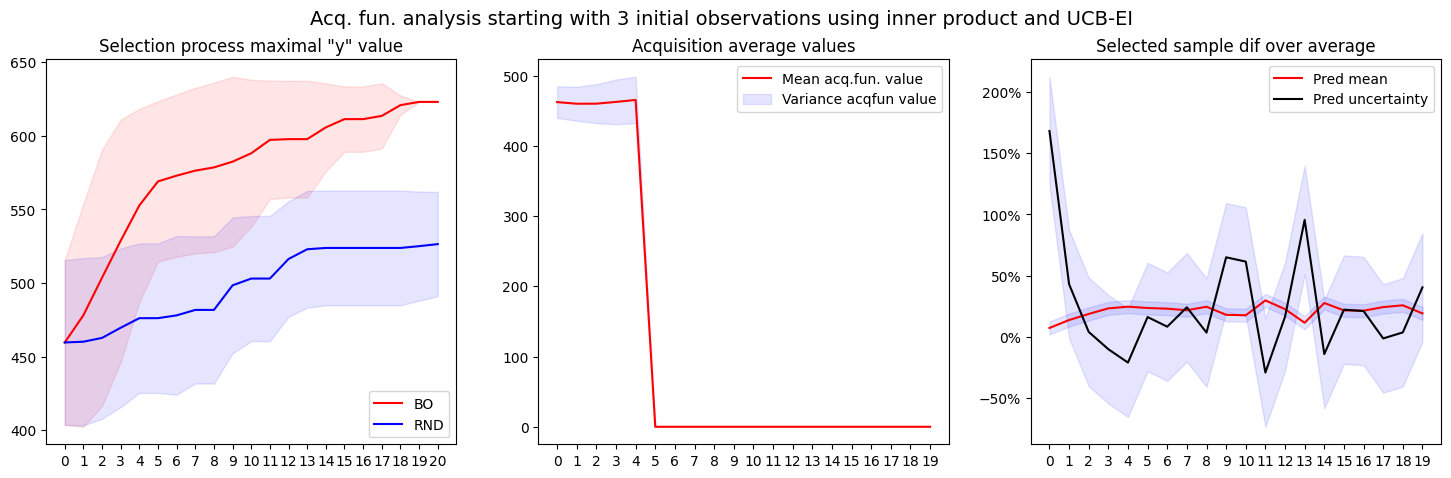

In [15]:
from gauche.kernels.fingerprint_kernels.inner_product_kernel import InnerProductKernel
#Define the primordial settings to build the model:
kernel = InnerProductKernel
aq_fn = 'UCB-EI'
train_size = 0.01
#Number of trials to average:
trials = 10
#Creation of lists that track the different values from the BO-Framework
lists = create_lists()
#Translation from staring percentage to number of samples that are considerd at the first iteration 
n_train_samples = int(len(y)*train_size)
#Start of the n-defined trials:
for trial in range(trials):
    bo_selection, rand_selection, acq_vals_mean, acq_vals_var, behaviour = BO_framework_ext(X,y,
                                                                            acquisition_function=aq_fn,
                                                                            bo_n_iteration= 20,
                                                                            start_set_size=train_size,
                                                                            kernel=kernel, 
                                                                            reproducibility=True, trial=trial,
                                                                            UCB_lambda=10)
    results = gather_inforamtion(lists, bo_selection, rand_selection, acq_vals_mean, acq_vals_var, behaviour)
#Plot the results of all the trials done:
plot_analysis(results= results, n_train_samples=n_train_samples, kern_name='inner product', aqc_fun_name=aq_fn)

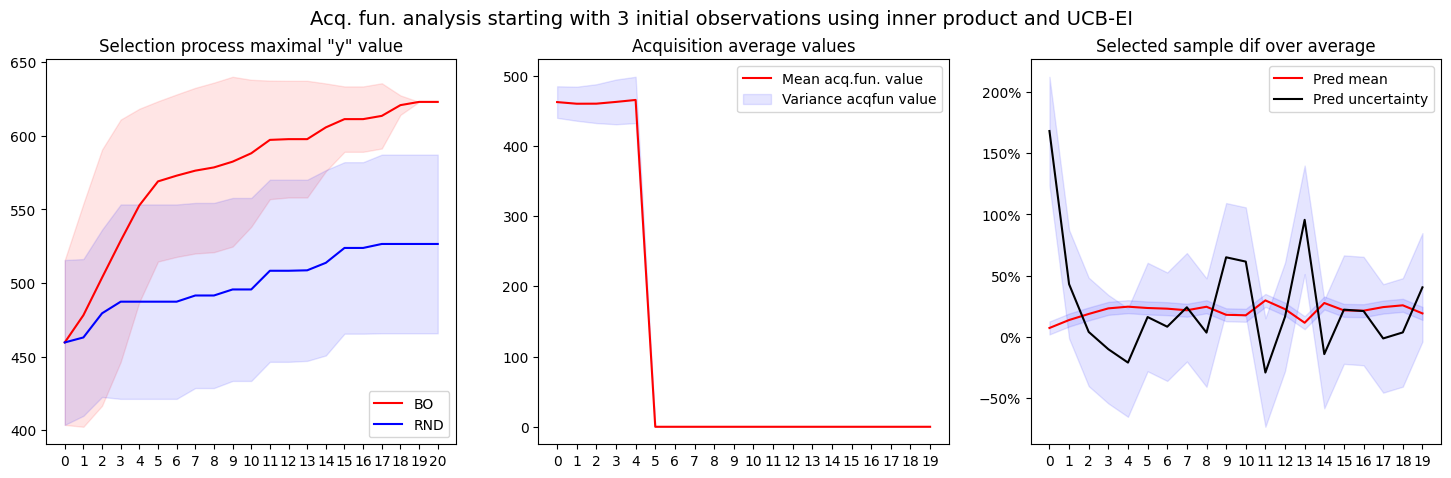

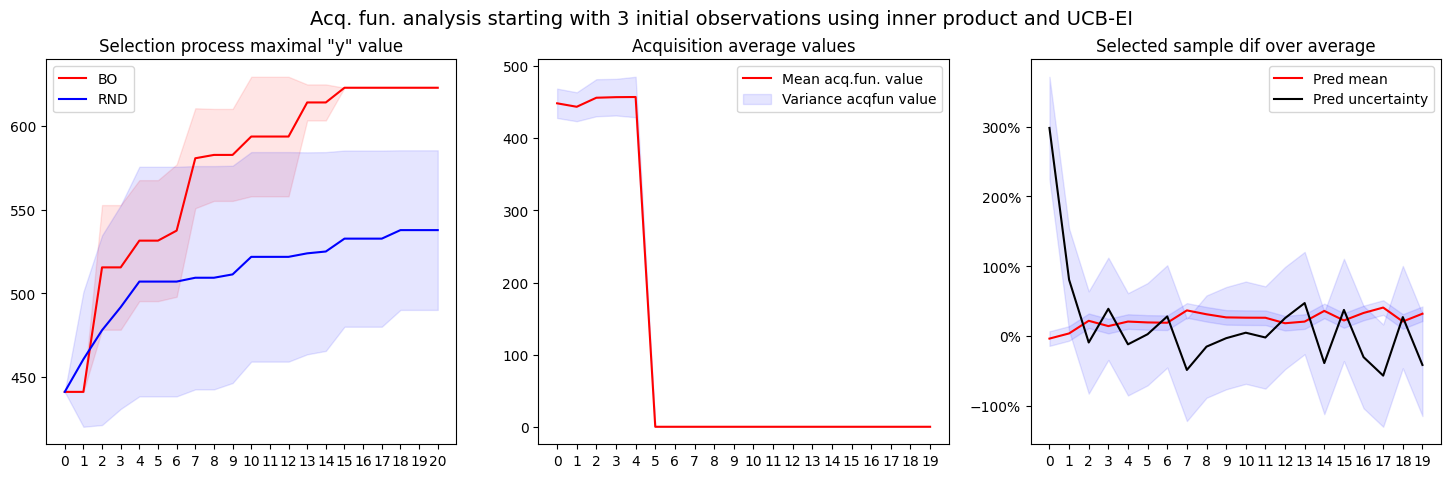

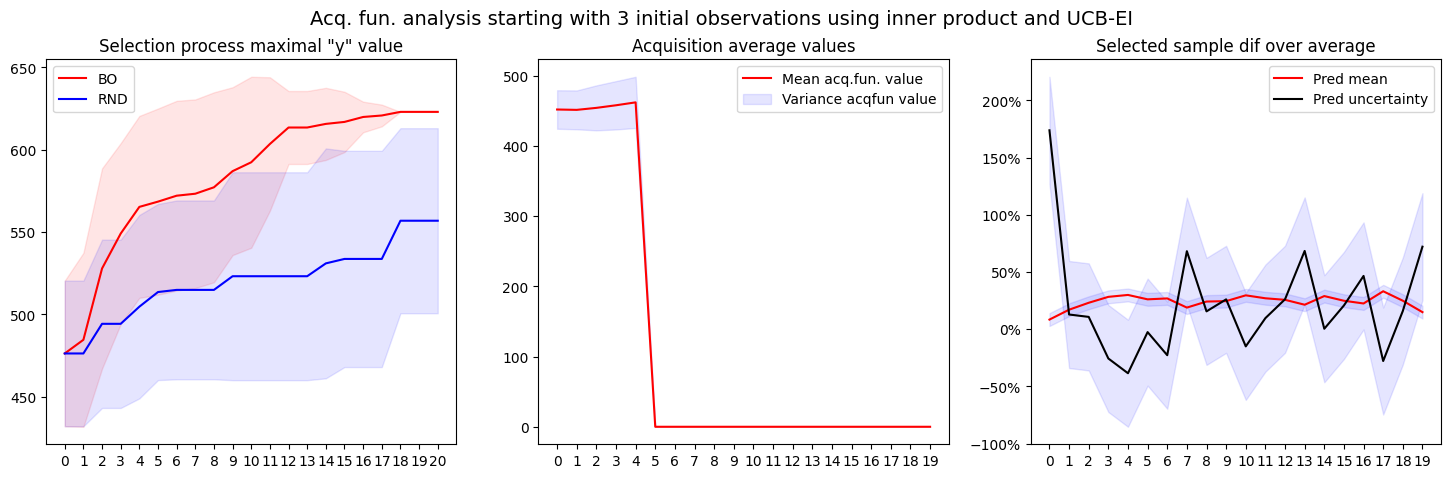

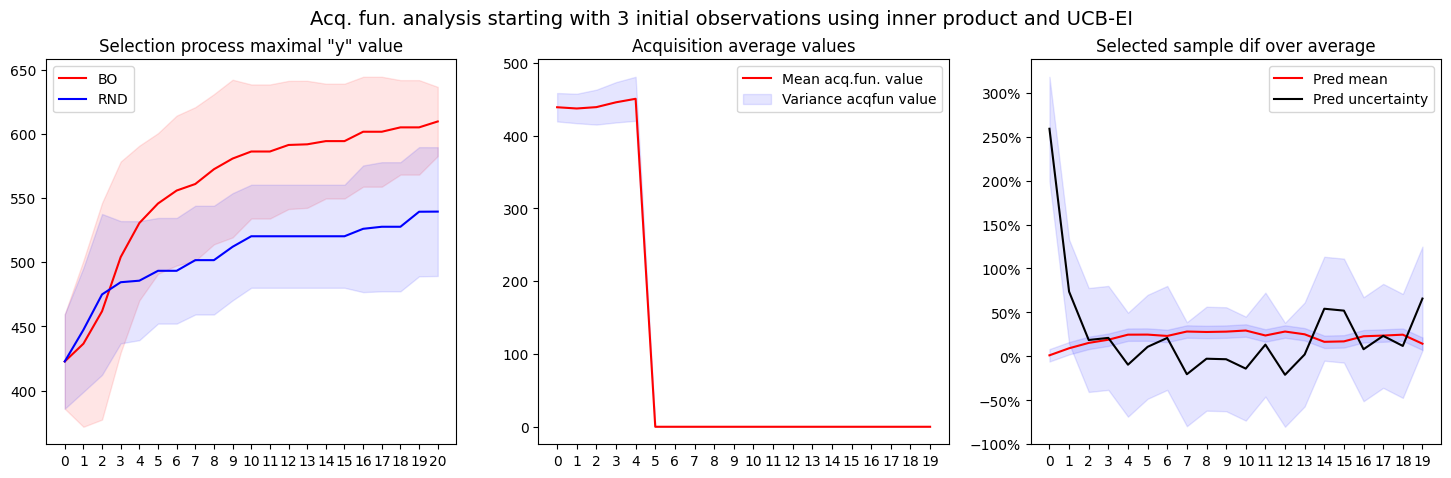

In [16]:
from gauche.kernels.fingerprint_kernels.inner_product_kernel import InnerProductKernel
#Define the primordial settings to build the model:
kernel = InnerProductKernel
aq_fn = 'UCB-EI'
train_size = 0.01
start_algorithms = ['none', 'min_similarity', 'kmeans', 'spectral_clustering']
#Number of trials to average:
trials = 10
#iterate over the different starting algorithms:
for str_alg in start_algorithms:
#Creation of lists that track the different values from the BO-Framework
    lists = create_lists()
    #Translation from staring percentage to number of samples that are considerd at the first iteration 
    n_train_samples = int(len(y)*train_size)
    #Start of the n-defined trials:
    for trial in range(trials):
        bo_selection, rand_selection, acq_vals_mean, acq_vals_var, behaviour = BO_framework_ext(X,y,
                                                                                acquisition_function=aq_fn,
                                                                                bo_n_iteration= 20,
                                                                                start_set_size=train_size,
                                                                                kernel=kernel, 
                                                                                reproducibility=True, trial=trial,
                                                                                UCB_lambda=10, smart_selection=str_alg)
        results = gather_inforamtion(lists, bo_selection, rand_selection, acq_vals_mean, acq_vals_var, behaviour)
    #Plot the results of all the trials done:
    plot_analysis(results= results, n_train_samples=n_train_samples, kern_name='inner product', aqc_fun_name=aq_fn)

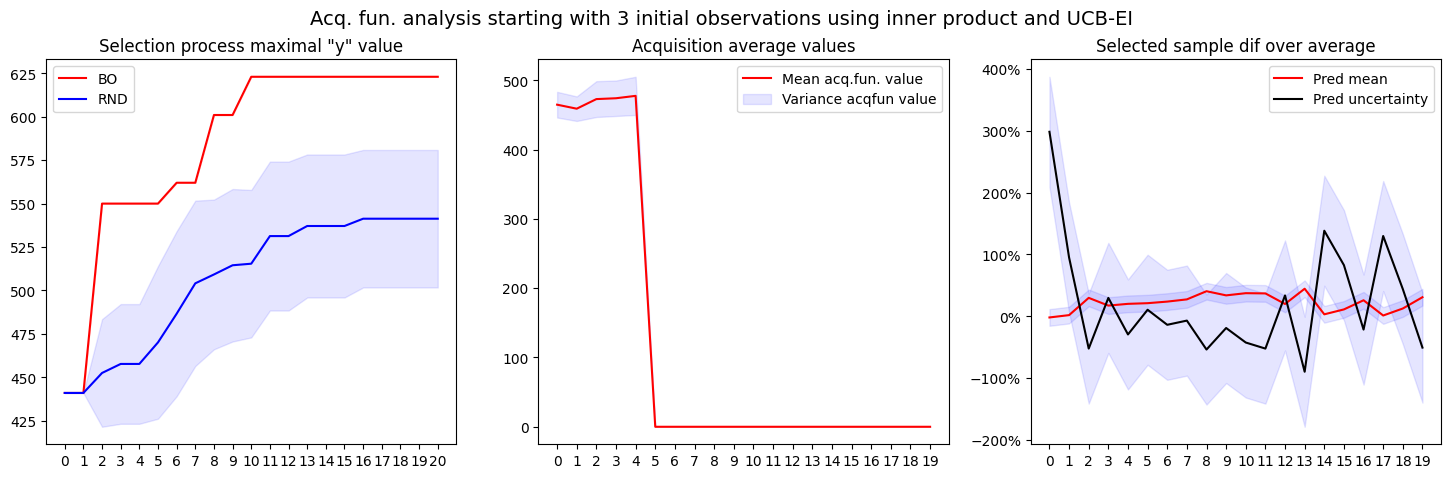

In [4]:
from gauche.kernels.fingerprint_kernels.inner_product_kernel import InnerProductKernel
#Define the primordial settings to build the model:
kernel = InnerProductKernel
aq_fn = 'UCB-EI'
train_size = 0.01
start_algorithms = ['min_similarity']
#Number of trials to average:
trials = 10
#iterate over the different starting algorithms:
for str_alg in start_algorithms:
#Creation of lists that track the different values from the BO-Framework
    lists = create_lists()
    #Translation from staring percentage to number of samples that are considerd at the first iteration 
    n_train_samples = int(len(y)*train_size)
    #Start of the n-defined trials:
    for trial in range(trials):
        bo_selection, rand_selection, acq_vals_mean, acq_vals_var, behaviour = BO_framework_ext(X,y,
                                                                                acquisition_function=aq_fn,
                                                                                bo_n_iteration= 20,
                                                                                start_set_size=train_size,
                                                                                kernel=kernel, 
                                                                                reproducibility=False, trial=trial,
                                                                                UCB_lambda=10, smart_selection=str_alg)
        results = gather_inforamtion(lists, bo_selection, rand_selection, acq_vals_mean, acq_vals_var, behaviour)
    #Plot the results of all the trials done:
    plot_analysis(results= results, n_train_samples=n_train_samples, kern_name='inner product', aqc_fun_name=aq_fn)